In [15]:
# Import Libraries 
from plantcv import plantcv as pcv
import matplotlib


In [134]:
class options:
    def __init__(self):
        self.image = "D:/Hydrotek/Leaf Images/leaf6rgb.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "./vis_tutorial_results"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


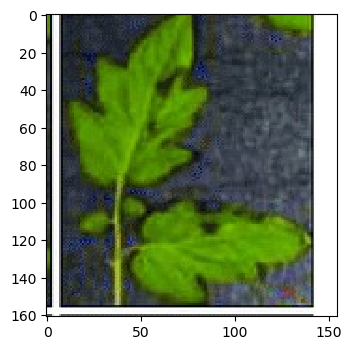

In [135]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image, mode='rgb')


In [136]:
    def __init__(self):
        self.image = "D:/Hydrotek/Leaf Images/leaf6rgb.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "./vis_tutorial_results"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


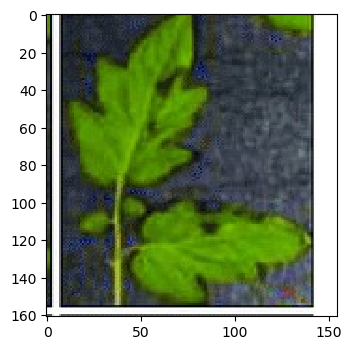

In [137]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img1, path, filename = pcv.readimage(filename=args.image, mode='rgb')


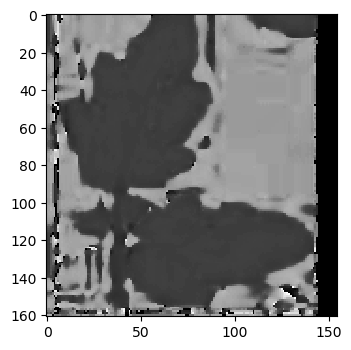

In [138]:
# Convert RGB to HSV and extract the saturation channel

# Inputs:
#   rgb_image - RGB image data 
#   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
s = pcv.rgb2gray_hsv(rgb_img=img, channel='h')


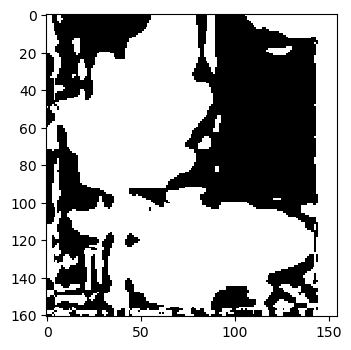

In [139]:
# Take a binary threshold to separate plant from background. 
# Threshold can be on either light or dark objects in the image. 

# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than 
#                 the background then standard threshold is done. If the object 
#                 is darker than the background then inverse thresholding is done. 
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='dark')


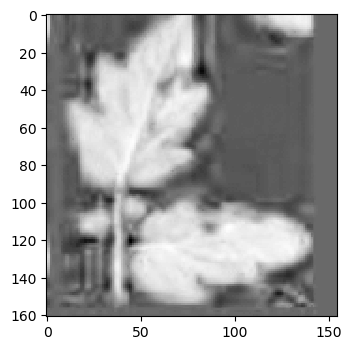

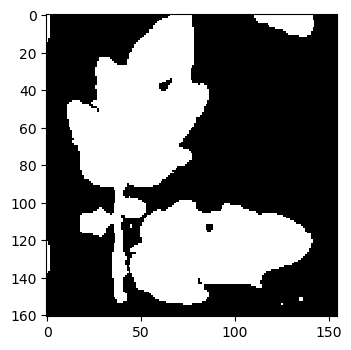

In [140]:
# Convert RGB to LAB and extract the blue channel ('b')

# Input:
#   rgb_img - RGB image data 
#   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

# Threshold the blue channel image 
b_thresh = pcv.threshold.binary(gray_img=b, threshold=150, max_value=255, 
                                object_type='light')



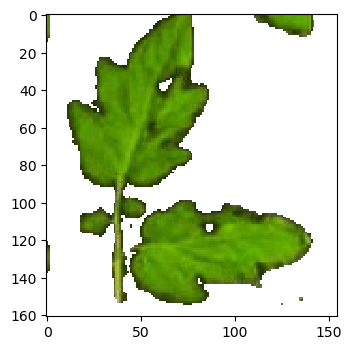

In [141]:
# Appy Mask (for VIS images, mask_color='white')

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
masked = pcv.apply_mask(img=img, mask=b_thresh, mask_color='white')


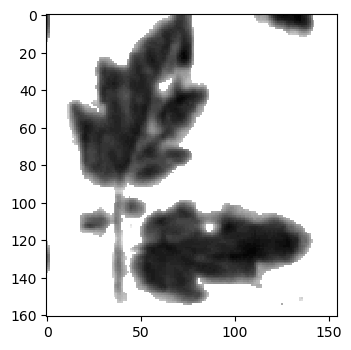

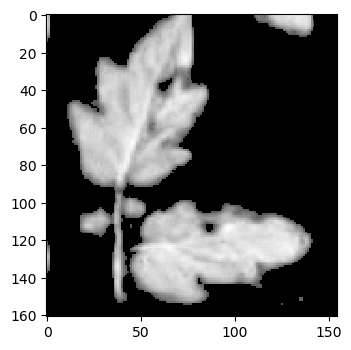

In [142]:
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels

masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')


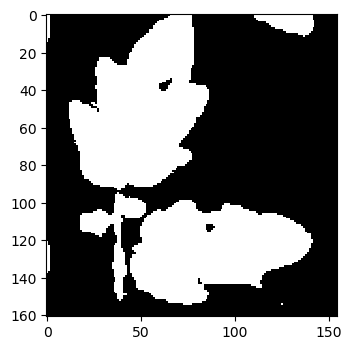

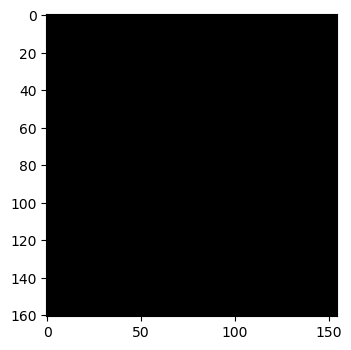

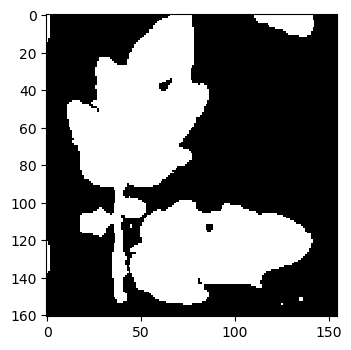

In [143]:
# Threshold the green-magenta and blue images

maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, 
                                      max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, 
                                       max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                      max_value=255, object_type='light')


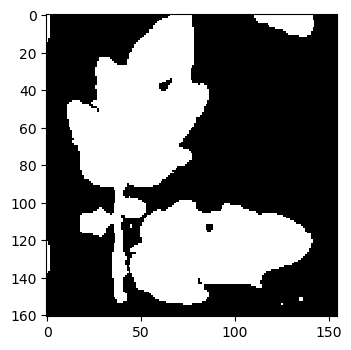

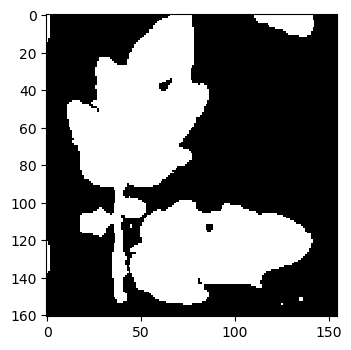

In [144]:
# Join the thresholded saturation and blue-yellow images (OR)

ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)


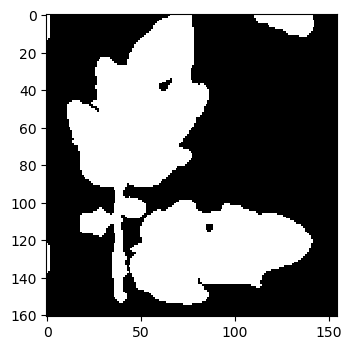

In [145]:
# Opening filters out bright noise from an image.

# Inputs:
#   gray_img - Grayscale or binary image data
#   kernel - Optional neighborhood, expressed as an array of 1's and 0's. If None (default),
#   uses cross-shaped structuring element.
opened_ab = pcv.opening(gray_img=ab)



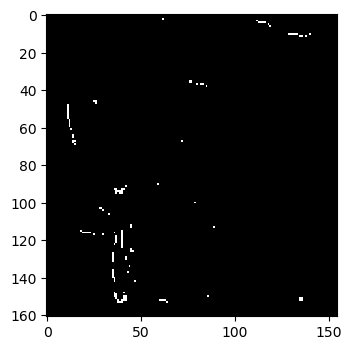

In [146]:
# Depending on the situation it might be useful to use the 
# exclusive or (pcv.logical_xor) function. 

# Inputs: 
#   bin_img1 - Binary image data to be compared to bin_img2
#   bin_img2 - Binary image data to be compared to bin_img1
xor_img = pcv.logical_xor(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)


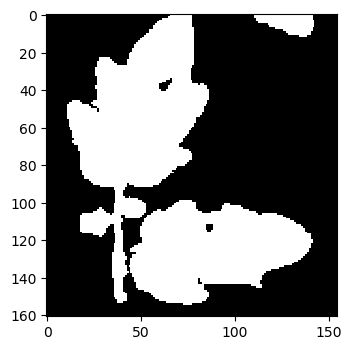

In [147]:



# Fill small objects (reduce image noise) 

# Inputs: 
#   bin_img - Binary image data 
#   size - Minimum object area size in pixels (must be an integer), and smaller objects will be filled
ab_fill = pcv.fill(bin_img=ab, size=200)


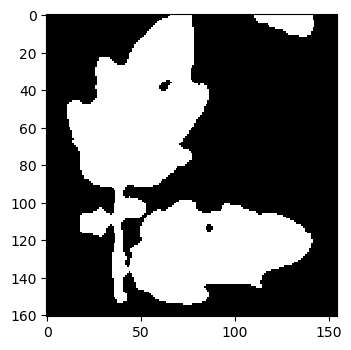

In [148]:
# Closing filters out dark noise from an image.

# Inputs:
#   gray_img - Grayscale or binary image data
#   kernel - Optional neighborhood, expressed as an array of 1's and 0's. If None (default),
#   uses cross-shaped structuring element.
closed_ab = pcv.closing(gray_img=ab_fill)



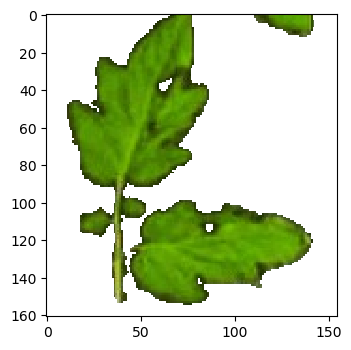

In [149]:
# Apply mask (for VIS images, mask_color=white)
masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')


In [30]:
pcv.params.debug = "print"

analysis_image = pcv.analyze_color(rgb_img=masked, mask=b, hist_plot_type='RGB')

# Access data stored out from analyze_color
hue_circular_mean = pcv.outputs.observations['hue_circular_mean']['value']


In [31]:
import cv2

img = cv2.imread('D:/Hydrotek/Thermal Wokflow/RGB/cropped leaf.jpg',0)
hist = cv2.calcHist([img],[0],b,[256],[0,256])

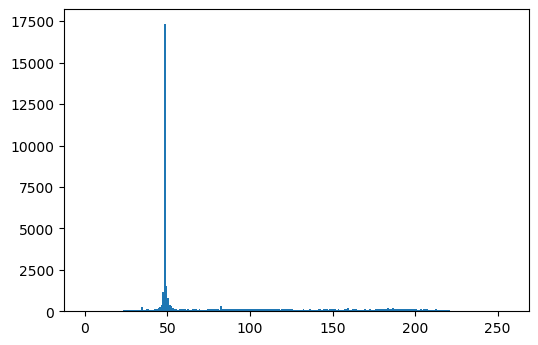

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('D:/Hydrotek/Thermal Wokflow/RGB/cropped leaf.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

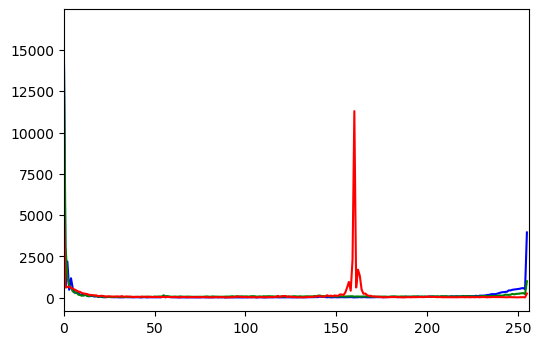

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('D:/Hydrotek/Thermal Wokflow/RGB/cropped leaf.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

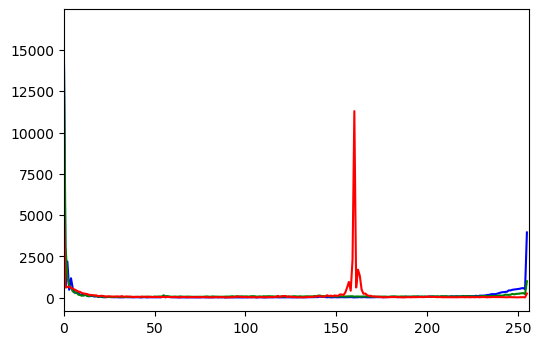

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('D:/Hydrotek/Thermal Wokflow/RGB/cropped leaf.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [35]:
class options:
    def __init__(self):
        self.image = "D:/Hydrotek/Leaf Images/leaf2.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "./vis_tutorial_results"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


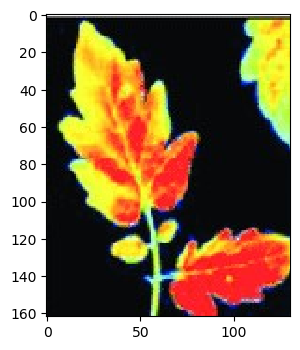

In [36]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)


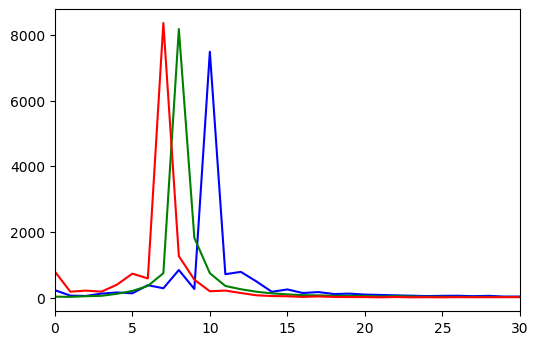

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('D:/Hydrotek/Leaf Images/leaf3.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,30])

In [38]:
color_histogram = pcv.analyze_color(rgb_img=img, mask=b_thresh, hist_plot_type='all')

error: OpenCV(3.4.11) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-hzi5bf28\opencv\modules\core\src\arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [ ]:
pcv.print_image(img=color_histogram, filename="vis_tutorial_color_hist.jpg")

In [ ]:
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked, x=10, y=10, h=20, w=20)

In [ ]:
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=id_objects, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')


In [ ]:
id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=b_thresh)

In [114]:
from plantcv import plantcv as pcv

# Set global debug behavior to None (default), "print" (to file), or "plot" (Jupyter Notebooks or X11)

pcv.params.debug = "print"

# Analyze Color

color_header, color_data, analysis_images = pcv.analyze_color(masked, b, 'ALL')

TypeError: cannot unpack non-iterable ggplot object

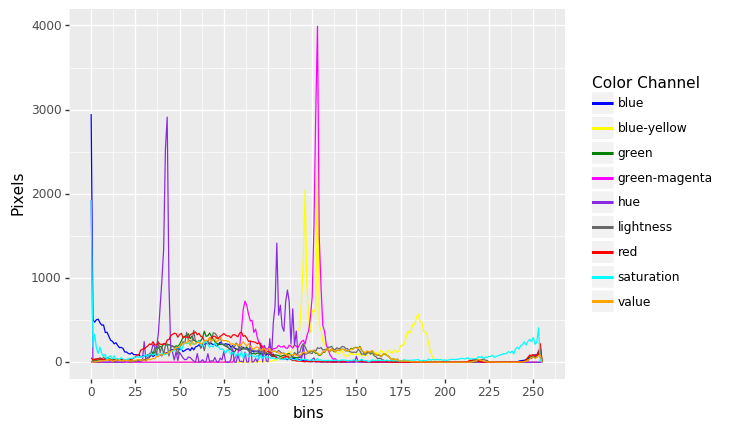

<ggplot: (-9223371866480982200)>


TypeError: cannot unpack non-iterable ggplot object

In [150]:
# Determine color properties: Histograms, Color Slices and Pseudocolored Images, output color analyzed images (optional)
color_header, color_data, color_img = pcv.analyze_color(img, b, 'ALL')



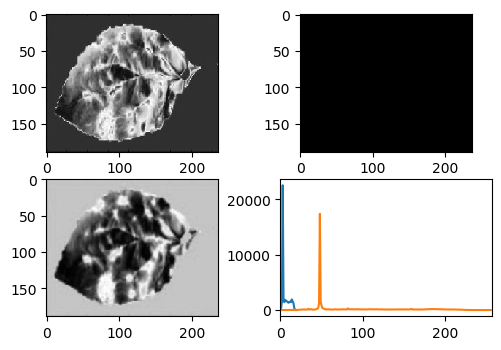

In [99]:
img = cv2.imread('D:/Hydrotek/Thermal Wokflow/RGB/cropped leaf.jpg',0)



# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[20],[0,256])
hist_mask = cv2.calcHist([img],[0],b,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(b, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()